In [3]:
import numpy as np
import matplotlib.pyplot as plt
import struct 
import seaborn as sns
sns.set()

In [4]:
a_w = np.empty((1201,1201))
s_filename = 'N19W156.hgt'
f = open(s_filename, 'rb')
for i in range(1201):
    for j in range(1201):
        b_buf = f.read(2)
        val = struct.unpack('>h', b_buf)
        a_w[i,j] = val[0]

In [5]:
print(np.mean(a_w))

1011.6930326587405


In [63]:
def Gradient(a_array):
    #input is a N dimensional array
    N = len(a_array.shape) # number of dimensions
    print(N)
    a_gradient = []
    dx = [1.0]*N
    a_part1 = [slice(None)]*N
    a_part2 = [slice(None)]*N
    a_part3 = [slice(None)]*N
    # The main trick here which I learned from np.gradient
    # is that I use central differences on all points except the first differences on endpoints
    for i in range(N):
        # select out appropriate parts for this dimension
        out = np.empty_like(a_array)
        a_part1[i] = slice(1, -1)
        a_part2[i] = slice(2, None)
        a_part3[i] = slice(None, -2)
        # 1D equivalent -- out[1:-1] = (f[2:] - f[:-2])/2.0
        out[a_part1] = (a_array[a_part2] - a_array[a_part3])/2.0
        a_part1[i] = 0
        a_part2[i] = 1
        a_part3[i] = 0
        # 1D equivalent -- out[0] = (f[1] - f[0])
        out[a_part1] = (a_array[a_part2] - a_array[a_part3])
        a_part1[i] = -1
        a_part2[i] = -1
        a_part3[i] = -2
        # 1D equivalent -- out[-1] = (f[-1] - f[-2])
        out[a_part1] = (a_array[a_part2] - a_array[a_part3])

        # Here I divide by step size
        a_gradient.append(out / dx[i])

        # empty the arrays to reuse them
        a_part1[i] = slice(None)
        a_part2[i] = slice(None)
        a_part3[i] = slice(None)
        
    return a_gradient

In [64]:
a_grad = Gradient(a_w)

2


In [65]:
print(len(a_grad))

2


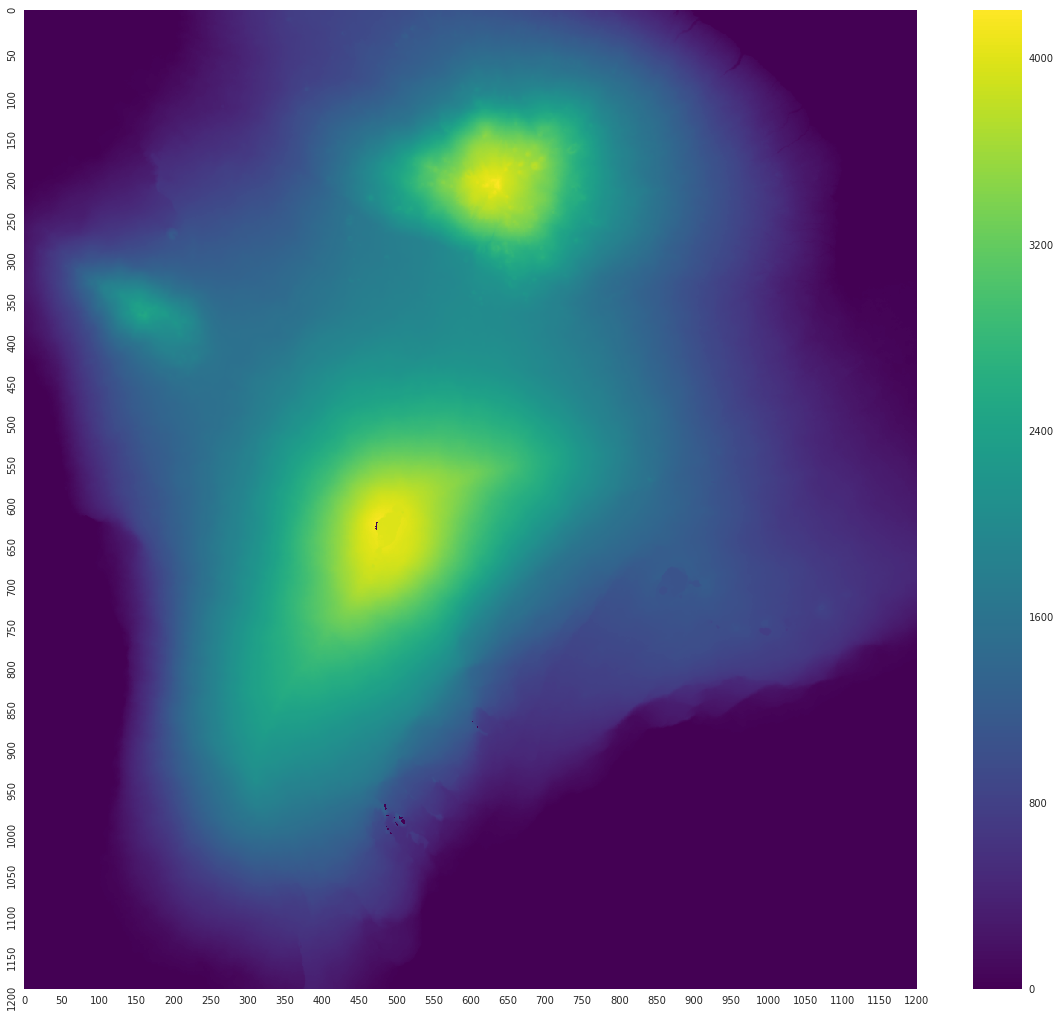

In [80]:
plt.figure(figsize = (20,18))
sns.heatmap(a_w,cmap = 'viridis', vmin = 0,xticklabels = 50, yticklabels = 50)

In [67]:
a_intensity = (a_grad[0])/np.sqrt(a_grad[0]**2+a_grad[1]**2 + 1)

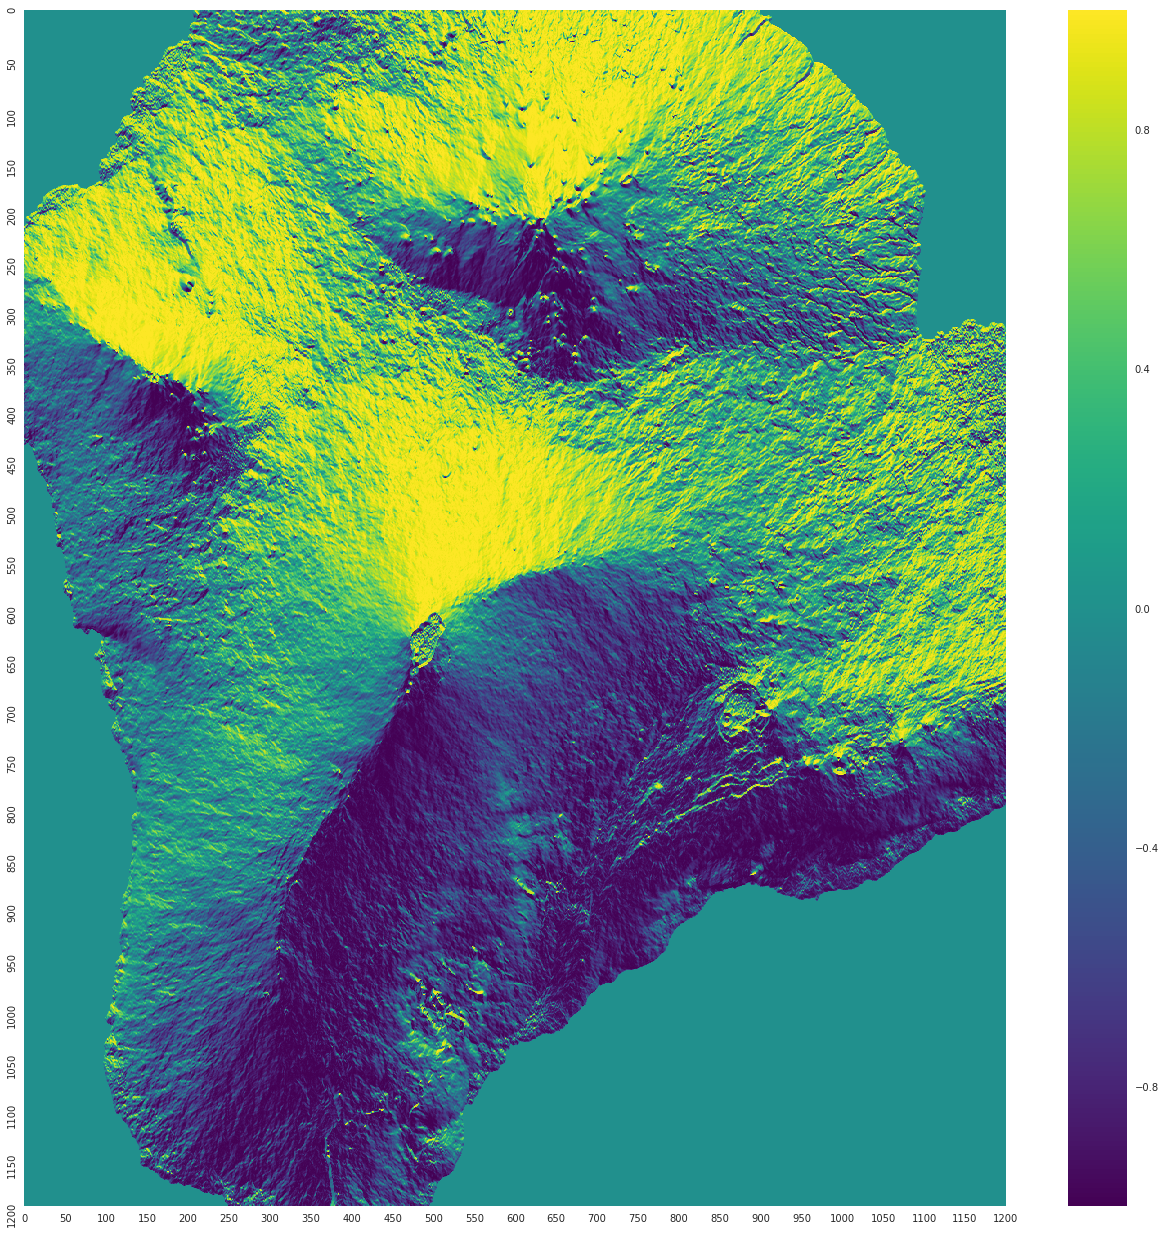

In [79]:
plt.figure(figsize = (22,22))
sns.heatmap(a_intensity,cmap = 'viridis', xticklabels = 50, yticklabels = 50)
